### Ensemble - RandomForest & ExtraTree
- learning algorithm: Supervised learning, Ensemble, Bagging
- learninf algorithm: RandomForest
- 
- Bagging: allow repetition, Random Sampling, same model used
    - represent algorithm: RandomForest Classification/Regression
- Pasting: reject repetition, Random Sampling, same model used
    - represent algorithm: ExtraTree Classification/Regression

#### Wine Classification
- feature: alcohol, sugar, pH
- label: class
- 
- wine kind: 0, 1 (red, white I don't know which one is red wine)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
file_path = '../data/wine.csv'
wine_df = pd.read_csv(file_path)

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
# label의 class 분포
wine_df['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

In [6]:
# feature scaling need..?
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [17]:
import seaborn as sns

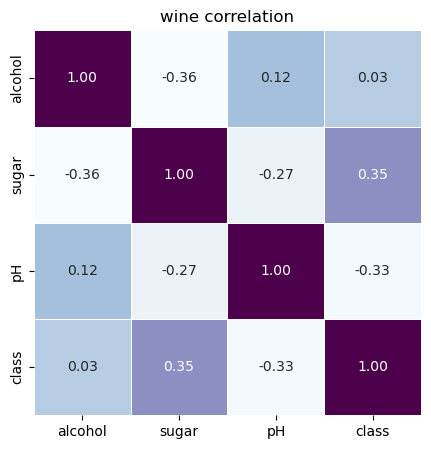

In [21]:
corr_wine = wine_df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_wine, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('wine correlation')
plt.show()

In [9]:
feature_df = wine_df.drop(columns=['class'])
label_sr = wine_df['class']

print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (6497, 3), 2D
label: (6497,), 1D


In [12]:
# train : test = 8 : 2
# stratify: label
# random_state: 25

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, stratify=label_sr, test_size=0.2, random_state=25)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train & test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (5197, 3), 2D
y train: (5197,), 1D

X test: (1300, 3), 2D
y test: (1300,), 1D

train & test ratio: 79.99 %, 20.01 %


- RandomForest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# model instance
# random_state: 25
# 내부에서 100개의 decision tree model의 datasets을 만듦

rf_model = RandomForestClassifier(random_state=25, oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=25)

In [26]:
# model parameter
print(f"classes_: {rf_model.classes_}")
print(f"n_classes_: {rf_model.n_classes_}\n")
print(f"feature_names_in_: {rf_model.feature_names_in_}")
print(f"n_features_in_: {rf_model.n_features_in_}")
print(f"feature_importances_: {rf_model.feature_importances_}")

classes_: [0. 1.]
n_classes_: 2

feature_names_in_: ['alcohol' 'sugar' 'pH']
n_features_in_: 3
feature_importances_: [0.23080557 0.49776162 0.27143281]


In [27]:
print(f"(bset?)estimator_: {rf_model.estimator_}\n")
for est in rf_model.estimators_:
    print(est)
print()
# for sample in rf_model.estimators_samples_:
#     print(sample)

(bset?)estimator_: DecisionTreeClassifier()

DecisionTreeClassifier(max_features='sqrt', random_state=1589671044)
DecisionTreeClassifier(max_features='sqrt', random_state=842096958)
DecisionTreeClassifier(max_features='sqrt', random_state=353376730)
DecisionTreeClassifier(max_features='sqrt', random_state=1860790415)
DecisionTreeClassifier(max_features='sqrt', random_state=1197604157)
DecisionTreeClassifier(max_features='sqrt', random_state=424446838)
DecisionTreeClassifier(max_features='sqrt', random_state=798482687)
DecisionTreeClassifier(max_features='sqrt', random_state=776635543)
DecisionTreeClassifier(max_features='sqrt', random_state=1765661612)
DecisionTreeClassifier(max_features='sqrt', random_state=646899634)
DecisionTreeClassifier(max_features='sqrt', random_state=504124157)
DecisionTreeClassifier(max_features='sqrt', random_state=1113162888)
DecisionTreeClassifier(max_features='sqrt', random_state=794434716)
DecisionTreeClassifier(max_features='sqrt', random_state=519300996

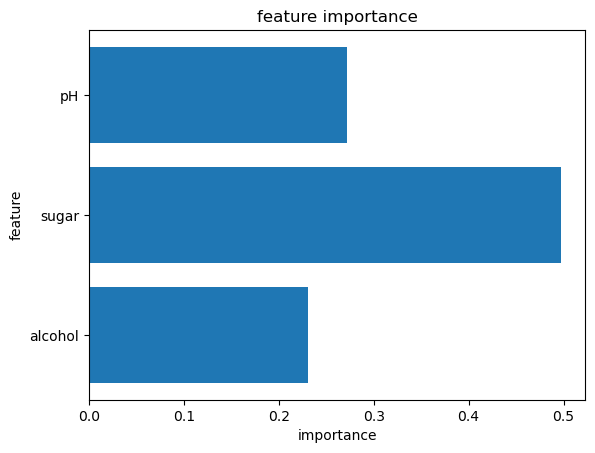

In [28]:
plt.barh(range(rf_model.n_features_in_), rf_model.feature_importances_, align='center')
plt.yticks(np.arange(rf_model.n_features_in_), rf_model.feature_names_in_)
plt.title('feature importance')
plt.xlabel("importance")
plt.ylabel("feature")
plt.show()

- 성능 평가

In [29]:
rf_train_score = rf_model.score(X_train, y_train)
rf_test_score = rf_model.score(X_test, y_test)

print(f"Random Forest train score: {rf_train_score*100:.2f} %")
print(f"Random Forest test score: {rf_test_score*100:.2f} %")

Random Forest train score: 99.79 %
Random Forest test score: 89.85 %


In [30]:
print(f"oob_score: {rf_model.oob_score_* 100:.2f} %")

oob_score: 89.97 %


- RandomizedsearchCV
    - GridSearchCV와 또 다른 Cross Validation Method
    - 값을 일일이 지정하기 여려운 경우에 이용
    - hyperparameter 최적화 class
    - 지정된 범위에서 지정된 횟수만큼 hyperparameter를 추출하여 조합하여 진행
        - n_iter, scoring, cv, return_tarin_score etc

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Random Forest Classifier hyperparameter
params = {'max_depth':range(2, 15), 'min_samples_leaf':range(5, 16), 'criterion':['gini', 'entropy', 'log_loss']}

In [33]:
rf_model = RandomForestClassifier(random_state=25)

In [46]:
# verbose: 학습과정을 볼 수 있음
seach_cv = RandomizedSearchCV(rf_model, param_distributions=params, return_train_score=True, n_iter=20, cv=5, verbose=4)

In [47]:
seach_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END criterion=log_loss, max_depth=6, min_samples_leaf=13;, score=(train=0.870, test=0.858) total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=6, min_samples_leaf=13;, score=(train=0.866, test=0.859) total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=6, min_samples_leaf=13;, score=(train=0.874, test=0.862) total time=   0.2s
[CV 4/5] END criterion=log_loss, max_depth=6, min_samples_leaf=13;, score=(train=0.871, test=0.859) total time=   0.2s
[CV 5/5] END criterion=log_loss, max_depth=6, min_samples_leaf=13;, score=(train=0.871, test=0.859) total time=   0.1s
[CV 1/5] END criterion=log_loss, max_depth=14, min_samples_leaf=13;, score=(train=0.891, test=0.869) total time=   0.2s
[CV 2/5] END criterion=log_loss, max_depth=14, min_samples_leaf=13;, score=(train=0.890, test=0.882) total time=   0.2s
[CV 3/5] END criterion=log_loss, max_depth=14, min_samples_leaf=13;, score=(train=0.898, test=0.859) to

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=25),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(2, 15),
                                        'min_samples_leaf': range(5, 16)},
                   return_train_score=True, verbose=4)

In [51]:
# model parameter
best_rf_model = seach_cv.best_estimator_
print(f"best_scores_: {seach_cv.best_score_*100:.2f} %")
print(f"best test score: {best_rf_model.score(X_test, y_test)*100:.2f} %")
print(f"best_params_: {seach_cv.best_params_}")
print(f"best_estimator_: {best_rf_model}")

cv_result_df = pd.DataFrame(seach_cv.cv_results_)
cv_result_df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

best_scores_: 87.57 %
best test score: 87.85 %
best_params_: {'min_samples_leaf': 7, 'max_depth': 12, 'criterion': 'gini'}
best_estimator_: RandomForestClassifier(max_depth=12, min_samples_leaf=7, random_state=25)


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'min_samples_leaf': 13, 'max_depth': 6, 'crit...",0.870406,0.859342,16
1,"{'min_samples_leaf': 13, 'max_depth': 14, 'cri...",0.892438,0.868768,10
2,"{'min_samples_leaf': 15, 'max_depth': 14, 'cri...",0.888926,0.864535,13
3,"{'min_samples_leaf': 7, 'max_depth': 9, 'crite...",0.898932,0.872039,6
4,"{'min_samples_leaf': 8, 'max_depth': 14, 'crit...",0.903454,0.874155,4
5,"{'min_samples_leaf': 14, 'max_depth': 11, 'cri...",0.888926,0.869922,9
6,"{'min_samples_leaf': 8, 'max_depth': 10, 'crit...",0.899124,0.870499,7
7,"{'min_samples_leaf': 6, 'max_depth': 11, 'crit...",0.907687,0.875310,2
8,"{'min_samples_leaf': 9, 'max_depth': 4, 'crite...",0.857177,0.847797,18
9,"{'min_samples_leaf': 14, 'max_depth': 11, 'cri...",0.889696,0.867420,11
